# Example notebook

In [20]:
%matplotlib notebook

In [21]:
import os

In [22]:
from buses import *

We will use example data. They were collected for twenty minutes in the morning on 3rd February 2021.

We will also provide profiling results.

In [23]:
import cProfile
pr = cProfile.Profile()
pr.enable()

Now, let's start analysing the data.

In [24]:
dataset = load_from_files(os.getcwd()+"/data", "data")

Here we load locations of bus stops from file, but it can be loaded from https://api.um.warszawa.pl/ as well.

In [25]:
locations_dataset = load_bus_stops_from_file(os.getcwd()+"/data", "bus_stops_0.txt")

In [26]:
pd.options.mode.chained_assignment = None

Let's see the buses that exceeded 50 km/h...

In [27]:
exceeding = all_exceeding_50(dataset)

In [28]:
all_exceeding_50(dataset)

Lines        Lon  VehicleNumber                Time        Lat Brigade  \
432    714  20.818045         4225.0 2021-02-03 08:44:35  52.267178       2   
663    511  20.955046         5974.0 2021-02-03 08:44:32  52.308517       1   
734    713  20.752647         7205.0 2021-02-03 08:44:35  52.211533      05   
867    501  21.045956         8155.0 2021-02-03 08:44:35  52.191240       1   
944    514  21.204646         8327.0 2021-02-03 08:44:35  52.247416       2   
...    ...        ...            ...                 ...        ...     ...   
472    156  20.991380         4414.0 2021-02-03 09:05:42  52.285426       5   
624    162  21.053249         5927.0 2021-02-03 09:05:41  52.198338     016   
902    523  20.960213         8211.0 2021-02-03 09:05:44  52.218164       1   
1081   402  21.093010         8588.0 2021-02-03 09:05:38  52.214852       2   
1193   Z14  21.166775         9205.0 2021-02-03 09:05:46  52.104008      02   

       Velocity  
432   56.185452  
663   67.794643  
734   51.030523  
867   70.709545  
944   57.981970  
...         ...  
472   70.210792  
624   56.625717  
902   53.724714  
1081  59.054572  
1193  50.476708  

[228 rows x 7 columns]

How many such buses do we have?

In [29]:
how_many_exceeded_50(dataset)

147

Let's plot them on the map.

<IPython.core.display.Javascript object>


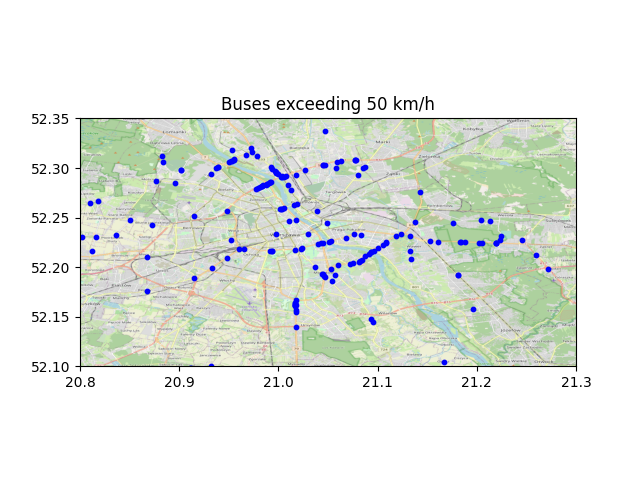

In [30]:
plot_on_map(exceeding, 'Buses exceeding 50 km/h')

And here we can see all the buses from the dataset:

<IPython.core.display.Javascript object>


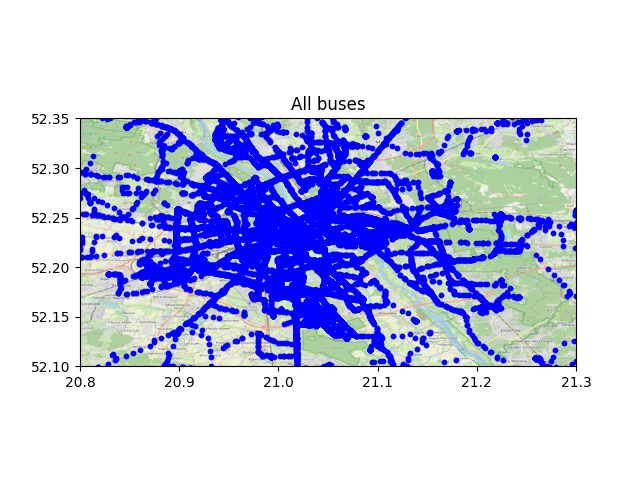

In [31]:
merged = pd.DataFrame({"Lines": [], "Lon": [], "VehicleNumber": [], "Time": [], "Lat": [], "Brigade": []})
for i in range(len(dataset)):
    merged = pd.concat([merged, dataset[i]])
plot_on_map(merged,"All buses")

Now we would like to check percentage of buses exceeding 50 km/h in some regions.

In [32]:
help(percentage_exceeding_50)

Help on function percentage_exceeding_50 in module buses:

percentage_exceeding_50(dataset, place_lat, place_lon, radius)
    Returns percentage of buses exceeding 50 km/h near some place for the given dataset. By 'near' we understand in a circle with its center in the given location and with given radius.
    :param dataset: List of pandas.DataFrames, each corresponding to one moment of time. Each of these dataframes should have columns: "Lines", "Lon", "VehicleNumber", "Time", "Lat", "Brigade".
    :param place_lat: latitude of the place of interest (numeric).
    :param place_lon: longitude of the place of interest (numeric).
    :param radius: radius of circle around the place (numeric).
    :return: percentage of buses exceeding 50 km/h.



In [33]:
percentage_exceeding_50(dataset, 52.21, 21.1, 1)

0.22727272727272727

In [34]:
percentage_exceeding_50(dataset, 52.30, 21.0, 1)

0.14893617021276595

And now, let's check how punctual the buses on our chosen bus stop are.

In [35]:
help(is_on_time)

Help on function is_on_time in module buses:

is_on_time(dataset, locations_dataset, bus_stop_name, bus_stop_number, line, api_key, verbose=True)
    :param dataset: List of pandas.DataFrames, each corresponding to one moment of time. Each of these dataframes should have columns: "Lines", "Lon", "VehicleNumber", "Time", "Lat", "Brigade".
    :param locations_dataset: pandas.DataFrame containing locations of bus stops. Columns: "zespol", "slupek", "nazwa_zespolu", "id_ulicy", "szer_geo", "dlug_geo", "kierunek".
    :param bus_stop_name: Name of the bus stop given, for example: "Marszałkowska".
    :param bus_stop_number: Number of the bus stop given as string, for example "01".
    :param line: Number of line, for example 520.
    :param api_key: personal api key.
    :param verbose: If True, additional information about number of all buses and number of punctual buses will be printed. Default is True.
    :return: Fraction of buses that were on time for the given dataset, line and bus 

In [36]:
is_on_time(dataset, locations_dataset, "Marszałkowska", "01", 520, api_key='b2b6deb9-bb03-4279-b25d-55fa1bb97690')

There should be 2 such bus(es) according to schedule in the analysed time period. 2 of them was/were on time.
Fraction of punctual buses for the given bus stop and line: 


1.0

In [37]:
is_on_time(dataset, locations_dataset, "Marszałkowska", "01", 521, api_key='b2b6deb9-bb03-4279-b25d-55fa1bb97690')

The input data is not correct! This line does not run in this region. /Your api key is not correct.


In [38]:
pr.disable()
 
pr.print_stats(sort='time')

         74042164 function calls (73583149 primitive calls) in 60.223 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 15359605    6.928    0.000    6.928    0.000 geomath.py:106(polyval)
   197055    4.249    0.000   28.062    0.000 geodesic.py:704(_GenInverse)
   197055    2.488    0.000    4.289    0.000 geodesic.py:366(_C4coeff)
   197055    2.427    0.000    4.023    0.000 geodesic.py:339(_C3coeff)
   282063    2.421    0.000   13.614    0.000 geodesic.py:627(_Lambda12)
   197055    2.355    0.000   13.365    0.000 geodesic.py:274(__init__)
   478363    2.270    0.000   10.109    0.000 geodesic.py:429(_Lengths)
  1540262    2.213    0.000    2.391    0.000 geodesic.py:121(_SinCosSeries)
   478363    1.922    0.000    3.084    0.000 geodesic.py:204(_C1f)
   591165    1.705    0.000    3.009    0.000 geomath.py:161(sincosd)
        6    1.300    0.217    1.300    0.217 {method 'read' of '_ssl._SSLSocket' objects}
788220/

    36627    0.006    0.000    0.006    0.000 {method 'append' of 'list' objects}
      380    0.006    0.000    0.294    0.001 merge.py:1284(_get_join_indexers)
     1764    0.006    0.000    0.011    0.000 shape_base.py:83(atleast_2d)
     6100    0.006    0.000    0.019    0.000 base.py:2637(get_loc)
     4370    0.006    0.000    0.078    0.000 blocks.py:694(copy)
     3040    0.006    0.000    0.016    0.000 generic.py:1523(_is_level_reference)
     7571    0.006    0.000    0.055    0.000 common.py:339(is_categorical)
     5985    0.006    0.000    0.013    0.000 _dtype.py:190(_datetime_metadata_str)
     7676    0.006    0.000    0.006    0.000 {method 'fill' of 'numpy.ndarray' objects}
     7155    0.006    0.000    0.016    0.000 common.py:685(is_dtype_equal)
     6546    0.006    0.000    0.011    0.000 series.py:432(name)
      340    0.006    0.000    0.725    0.002 concat.py:454(get_result)
     2747    0.006    0.000    0.053    0.000 frame.py:3073(_box_col_values)
     3

     4751    0.001    0.000    0.001    0.000 {method 'add' of 'set' objects}
     1968    0.001    0.000    0.002    0.000 concat.py:119(<genexpr>)
     2979    0.001    0.000    0.001    0.000 {method 'startswith' of 'str' objects}
       95    0.001    0.000    0.053    0.001 generic.py:8553(_align_series)
      238    0.001    0.000    0.003    0.000 api.py:278(<setcomp>)
      682    0.001    0.000    0.002    0.000 numpy_.py:417(to_numpy)
      591    0.001    0.000    0.039    0.000 base.py:4076(identical)
      112    0.001    0.000    0.004    0.000 session.py:586(sign)
      573    0.001    0.000    0.002    0.000 __init__.py:124(_maybe_match_name)
      287    0.001    0.000    0.001    0.000 contextlib.py:59(__init__)
      720    0.001    0.000    0.001    0.000 base.py:3986(<setcomp>)
       95    0.001    0.000    0.001    0.000 {pandas._libs.algos.take_1d_float64_float64}
      285    0.001    0.000    0.002    0.000 __init__.py:159(maybe_upcast_for_op)
     1239    0.0

      760    0.001    0.000    0.004    0.000 merge.py:951(<lambda>)
     2805    0.001    0.000    0.001    0.000 {pandas._libs.algos.ensure_object}
       95    0.001    0.000    0.012    0.000 datetimelike.py:904(_delegate_method)
      192    0.001    0.000    0.002    0.000 numeric.py:261(_convert_scalar_indexer)
     1205    0.001    0.000    0.001    0.000 blocks.py:3099(<listcomp>)
      570    0.001    0.000    0.010    0.000 <__array_function__ internals>:2(append)
       95    0.001    0.000    0.001    0.000 {built-in method posix.get_terminal_size}
     2091    0.001    0.000    0.001    0.000 concat.py:105(<genexpr>)
      206    0.001    0.000    0.049    0.000 format.py:1202(get_result)
       95    0.001    0.000    0.011    0.000 accessors.py:37(_get_values)
       97    0.001    0.000    0.004    0.000 session.py:567(msg)
      303    0.001    0.000    0.005    0.000 format.py:443(_get_adjustment)
       97    0.001    0.000    0.038    0.000 generic.py:3636(_check_i

       90    0.000    0.000    0.010    0.000 managers.py:1797(_simple_blockify)
       24    0.000    0.000    0.001    0.000 datetimes.py:259(_simple_new)
       40    0.000    0.000    0.001    0.000 core.py:2938(__array_finalize__)
       21    0.000    0.000    0.011    0.001 parsers.py:792(__init__)
       21    0.000    0.000    0.148    0.007 parsers.py:530(parser_f)
       40    0.000    0.000    0.000    0.000 font_manager.py:778(set_weight)
       21    0.000    0.000    0.000    0.000 parsers.py:1345(__init__)
    46/38    0.000    0.000    0.001    0.000 {method 'view' of 'numpy.generic' objects}
      190    0.000    0.000    0.001    0.000 expressions.py:160(_has_bool_dtype)
      380    0.000    0.000    0.000    0.000 base.py:2210(_validate_sort_keyword)
      243    0.000    0.000    0.000    0.000 api.py:242(<setcomp>)
      287    0.000    0.000    0.000    0.000 base.py:3043(_convert_list_indexer)
        2    0.000    0.000    0.000    0.000 ssl.py:1066(_real_clos

      104    0.000    0.000    0.000    0.000 artist.py:358(set_transform)
      180    0.000    0.000    0.000    0.000 __init__.py:2113(type_name)
        2    0.000    0.000    0.001    0.001 figure.py:275(__init__)
       20    0.000    0.000    0.003    0.000 shape_base.py:612(column_stack)
       54    0.000    0.000    0.001    0.000 builtin_trap.py:39(__enter__)
       38    0.000    0.000    0.000    0.000 traitlets.py:486(_dynamic_default_callable)
    75/22    0.000    0.000   60.212    2.737 {method 'send' of 'generator' objects}
       42    0.000    0.000    0.000    0.000 parsers.py:367(_validate_integer)
       97    0.000    0.000    0.000    0.000 managers.py:683(is_view)
        2    0.000    0.000    0.009    0.005 colors.py:1050(autoscale_None)
      398    0.000    0.000    0.000    0.000 common.py:187(<genexpr>)
       28    0.000    0.000    0.001    0.000 transforms.py:1986(scale)
        4    0.000    0.000    0.000    0.000 {built-in method posix.urandom}
   

       21    0.000    0.000    0.000    0.000 parsers.py:1842(_do_date_conversions)
        2    0.000    0.000    0.001    0.000 indexing.py:782(_setitem_with_indexer)
       12    0.000    0.000    0.000    0.000 stride_tricks.py:185(_broadcast_shape)
        4    0.000    0.000    0.001    0.000 _base.py:1116(_set_title_offset_trans)
        4    0.000    0.000    0.001    0.000 _base.py:3495(set_ylim)
        2    0.000    0.000    0.000    0.000 {method '_wrap_socket' of '_ssl._SSLContext' objects}
       84    0.000    0.000    0.000    0.000 re.py:169(match)
       36    0.000    0.000    0.000    0.000 indexing.py:1976(_validate_key)
       20    0.000    0.000    0.001    0.000 datetimes.py:1806(objects_to_datetime64ns)
       22    0.000    0.000    0.017    0.001 backend_webagg_core.py:345(send_event)
       34    0.000    0.000    0.000    0.000 patches.py:315(_set_edgecolor)
       36    0.000    0.000    0.000    0.000 lines.py:1061(set_drawstyle)
        4    0.000    0.

        5    0.000    0.000    0.005    0.001 displayhook.py:74(finish_displayhook)
       15    0.000    0.000    0.000    0.000 queues.py:256(get_nowait)
       60    0.000    0.000    0.000    0.000 axis.py:325(_set_artist_props)
       12    0.000    0.000    0.001    0.000 construction.py:252(<listcomp>)
        2    0.000    0.000    0.001    0.000 backend_webagg_core.py:449(get_javascript)
       36    0.000    0.000    0.000    0.000 lines.py:733(set_transform)
        2    0.000    0.000    0.000    0.000 ssl.py:964(sendall)
       15    0.000    0.000    0.005    0.000 threading.py:357(notify_all)
       22    0.000    0.000    0.000    0.000 weakref.py:44(__new__)
        8    0.000    0.000    0.000    0.000 client.py:1237(putheader)
       12    0.000    0.000    0.007    0.001 axis.py:229(set_clip_path)
        6    0.000    0.000    0.001    0.000 axis.py:559(_get_text2)
       64    0.000    0.000    0.000    0.000 axis.py:666(formatter)
     12/8    0.000    0.000    0

       39    0.000    0.000    0.000    0.000 prefilter.py:549(handle)
       54    0.000    0.000    0.000    0.000 indexing.py:716(<genexpr>)
       18    0.000    0.000    0.000    0.000 indexing.py:710(_is_nested_tuple_indexer)
       21    0.000    0.000    0.000    0.000 nanops.py:329(_na_ok_dtype)
       25    0.000    0.000    0.000    0.000 algorithms.py:205(_ensure_arraylike)
       12    0.000    0.000    0.000    0.000 patches.py:436(set_fill)
       36    0.000    0.000    0.000    0.000 lines.py:1213(set_markeredgecolor)
       14    0.000    0.000    0.000    0.000 artist.py:923(set_alpha)
        6    0.000    0.000    0.002    0.000 core.py:3557(shrink_mask)
        6    0.000    0.000    0.000    0.000 core.py:4511(ravel)
        2    0.000    0.000    0.151    0.076 client.py:972(send)
        2    0.000    0.000    0.001    0.000 backend_nbagg.py:107(get_javascript)
       15    0.000    0.000    0.000    0.000 payload.py:51(read_payload)
       39    0.000    0.000

       12    0.000    0.000    0.000    0.000 text.py:528(_update_clip_properties)
       32    0.000    0.000    0.000    0.000 ticker.py:536(set_useOffset)
       12    0.000    0.000    0.002    0.000 core.py:1824(_check_mask_axis)
       15    0.000    0.000    0.000    0.000 utils.py:51(_has_surrogates)
        2    0.000    0.000    0.122    0.061 ssl.py:1070(do_handshake)
       15    0.000    0.000    0.000    0.000 queue.py:206(_put)
       25    0.000    0.000    0.000    0.000 codecs.py:259(__init__)
        6    0.000    0.000    0.000    0.000 {method '_checkClosed' of '_io._IOBase' objects}
       23    0.000    0.000    0.000    0.000 {built-in method _heapq.heappush}
       77    0.000    0.000    0.000    0.000 format.py:764(<genexpr>)
        3    0.000    0.000    0.001    0.000 __init__.py:544(wrapper)
        2    0.000    0.000    0.000    0.000 _axes.py:4109(_parse_scatter_color_args)
        4    0.000    0.000    0.000    0.000 figure.py:199(update)
       22  

        2    0.000    0.000    0.000    0.000 ssl.py:636(write)
       13    0.000    0.000    0.000    0.000 pretty.py:401(_in_deferred_types)
        4    0.000    0.000    0.000    0.000 pathlib.py:385(wrapped)
        6    0.000    0.000    0.000    0.000 loader.py:231(_has_section)
       28    0.000    0.000    0.000    0.000 traitlets.py:215(__init__)
        5    0.000    0.000    0.000    0.000 re.py:184(sub)
        2    0.000    0.000    0.000    0.000 {method '__reduce_ex__' of 'object' objects}
        1    0.000    0.000    0.000    0.000 {method 'findall' of '_sre.SRE_Pattern' objects}
        4    0.000    0.000    0.000    0.000 {method 'extend' of 'collections.deque' objects}
        1    0.000    0.000    0.006    0.006 html.py:209(_write_table)
        1    0.000    0.000    0.000    0.000 html.py:243(_write_col_header)
        1    0.000    0.000    0.006    0.006 html.py:383(_write_body)
        1    0.000    0.000    0.007    0.007 format.py:957(to_html)
        

        4    0.000    0.000    0.000    0.000 _base.py:3629(get_yscale)
       12    0.000    0.000    0.000    0.000 axis.py:153(<dictcomp>)
        2    0.000    0.000    0.000    0.000 display.py:703(__init__)
        2    0.000    0.000    0.001    0.001 pydoc.py:1862(__call__)
        6    0.000    0.000    0.000    0.000 inspect.py:286(isroutine)
        2    0.000    0.000    0.000    0.000 inspect.py:3063(signature)
        4    0.000    0.000    0.000    0.000 traitlets.py:1698(make_dynamic_default)
        4    0.000    0.000    0.000    0.000 weakref.py:51(_cb)
        2    0.000    0.000    0.000    0.000 genericpath.py:117(_splitext)
        6    0.000    0.000    0.000    0.000 {built-in method time.monotonic}
        2    0.000    0.000    0.000    0.000 {built-in method _locale.setlocale}
        3    0.000    0.000    0.000    0.000 format.py:1027(has_index_names)
        3    0.000    0.000    0.000    0.000 format.py:1035(show_row_idx_names)
        2    0.000    0.0

        2    0.000    0.000    0.000    0.000 request.py:367(data)
        4    0.000    0.000    0.000    0.000 _base.py:588(<genexpr>)
        2    0.000    0.000    0.000    0.000 ssl.py:858(_check_connected)
       12    0.000    0.000    0.000    0.000 parse.py:98(_noop)
        2    0.000    0.000    0.000    0.000 inspect.py:81(ismethod)
        2    0.000    0.000    0.000    0.000 inspect.py:2821(return_annotation)
        2    0.000    0.000    0.000    0.000 traitlets.py:1083(compress)
        2    0.000    0.000    0.000    0.000 traitlets.py:2023(validate)
        2    0.000    0.000    0.000    0.000 weakref.py:73(__eq__)
        6    0.000    0.000    0.000    0.000 {function Config.__contains__ at 0x7f65f82d3400}
        4    0.000    0.000    0.000    0.000 {method 'toordinal' of 'datetime.date' objects}
        2    0.000    0.000    0.000    0.000 {method 'weekday' of 'datetime.date' objects}
        4    0.000    0.000    0.000    0.000 {built-in method _warnings._f